In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Project 0/Project 0/Notebooks"
import sys
sys.path.append(path)


from Analysis.Image_Classification.Classification import *
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_path = f"{path}/Test_Images"
model_path = f"{path}/Models"

positive_class = {'AP':4,'DP':16}
for pc, num_fixations in positive_class.items():
  
  model_dict = {f'Scanpath Images - {pc} - {num_fixations}':f'scanpath_images_{pc}', 
                  f'Temporal Images - {pc} - {num_fixations}':f'temporal_images_{pc}'}
  
  
  for image_folder, name in model_dict.items():
      
      print(f'training for {name}')
      
      for i in range(10):
        
          print(f'Run {i+1} out of 10')
          model_name = f'model_{name}_run_{i}'
          df = ValResults(image_folder=image_folder,image_path=image_path,model_path=model_path,
                          model_name=model_name,positive_class=pc,patience=10)
      
      results_df = pd.DataFrame.from_dict({'test_accuracy':[],'test_auc':[],'negative_class_ratio':[],'positive_class_ratio':[]} )
      for i in range(10):

          test_results = TestResults(image_folder=image_folder,image_path=image_path,model_path=model_path,
                                     model_name=model_name,positive_class=pc)
          results_df = pd.concat([results_df,test_results])

      results_df = results_df.groupby(results_df.index).agg({'test_accuracy':['mean','std'],
                                                                        'test_auc':['mean','std'],'positive_class_ratio':['mean'],
                                                                        'negative_class_ratio':['mean']})
      results_df.to_csv(path+f'/{name}_results.csv',index=False)

training for scanpath_images_AP
Run 1 out of 10
Epoch 1/30
1/1 [==============================] - 13s 13s/step - loss: 0.3195 - accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 100ms/step - loss: 0.2244 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 37ms/step - loss: 0.3339 - accuracy: 0.9375
Epoch 4/30
1/1 [==============================] - 0s 31ms/step - loss: 0.2828 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 33ms/step - loss: 0.2034 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 31ms/step - loss: 0.1197 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 34ms/step - loss: 0.1934 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 31ms/step - loss: 0.2240 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 36ms/step - loss: 0.2013 - accuracy: 0.9688
Epoch 10/30
1/1 [==============================] - 0s 29ms/step - loss: 0.1800

KeyError: ignored

####AP

In [ ]:
image_folder = 'Scanpath Images - AP'
path = path 
for i in range(10):
  print(f'Run {i+1} out of 10')
  model_name = f'model_scanpath_images_dp_run_{i}'
  ValResults(image_folder,path,model_name,positive_class='AP',patience=10)

Epoch 1/30
37/37 [==============================] - 2s 44ms/step - loss: 0.6987 - accuracy: 0.5811 - val_loss: 0.6734 - val_accuracy: 0.5896
Epoch 2/30
37/37 [==============================] - 1s 40ms/step - loss: 0.5846 - accuracy: 0.6997 - val_loss: 0.6827 - val_accuracy: 0.6269
Epoch 3/30
37/37 [==============================] - 1s 39ms/step - loss: 0.5524 - accuracy: 0.7363 - val_loss: 0.7132 - val_accuracy: 0.6045
Epoch 4/30
37/37 [==============================] - 1s 39ms/step - loss: 0.5015 - accuracy: 0.7756 - val_loss: 0.7876 - val_accuracy: 0.6119
Epoch 5/30
37/37 [==============================] - 1s 39ms/step - loss: 0.4771 - accuracy: 0.7927 - val_loss: 0.8817 - val_accuracy: 0.5746
Epoch 6/30
37/37 [==============================] - 1s 39ms/step - loss: 0.4893 - accuracy: 0.7730 - val_loss: 0.9341 - val_accuracy: 0.6045
Epoch 7/30
37/37 [==============================] - 1s 39ms/step - loss: 0.4295 - accuracy: 0.8234 - val_loss: 0.9665 - val_accuracy: 0.6194
Epoch 8/30
37

In [ ]:
meanResults = pd.DataFrame.from_dict({'test_acc':[],'test_auc':[],'negative_class_ratio':[],'positive_class_ratio':[]} )
imageFolder = 'Scanpath Images - AP'
path= path
for i in range(10):
  modelName = f'model_scanpath_images_ap_run_{i}'
  testResultsDf = getTestResults(imageFolder,path,modelName,positiveClass='AP')
  meanResults = pd.concat([meanResults,testResultsDf])
apScanResults = meanResults.groupby(meanResults.index).agg({'test_acc':['mean','std'],'test_auc':['mean','std'],'positive_class_ratio':['mean'],'negative_class_ratio':['mean']})

5/5 [==============================] - 0s 11ms/step - loss: 1.6671 - accuracy: 0.5038


In [ ]:
apScanResults.to_csv(path+'/AP_Mean_Scanpath_Results_AutoEpoch.csv',index=False)

In [ ]:
pd.read_csv(path+'/AP_Mean_Scanpath_Results_AutoEpoch.csv').test_auc.iloc[1:].astype(float).mean()

0.7249276663015033

# Random Hybrids

AP

In [ ]:
aucDist = []
r = 100
for i in range(r):
  print('\033[1m' + f'Step {i+1} out of {r}:' + '\033[0m')
  hybridAUC = randomHybridAUC(path,imageFolder='Scanpath Images - AP',positiveClass='AP',patience=10)
  aucDist.append(hybridAUC)
  pd.DataFrame.from_dict({'auc':aucDist}).to_csv(path+'/randomAuc100AP.csv',index=False)

Streaming output truncated to the last 5000 lines.
Epoch 27/30
37/37 [==============================] - 1s 25ms/step - loss: 0.7084 - accuracy: 0.5367 - val_loss: 0.6993 - val_accuracy: 0.6098
Epoch 28/30
37/37 [==============================] - 1s 25ms/step - loss: 0.7014 - accuracy: 0.5575 - val_loss: 0.6948 - val_accuracy: 0.5691
Epoch 29/30
37/37 [==============================] - 1s 25ms/step - loss: 0.7073 - accuracy: 0.5333 - val_loss: 0.6726 - val_accuracy: 0.6016
Epoch 30/30
37/37 [==============================] - 1s 25ms/step - loss: 0.7072 - accuracy: 0.5566 - val_loss: 0.6772 - val_accuracy: 0.5610
Epoch 1/30
37/37 [==============================] - 2s 46ms/step - loss: 0.7470 - accuracy: 0.5025 - val_loss: 0.7226 - val_accuracy: 0.3582
Epoch 2/30
37/37 [==============================] - 2s 41ms/step - loss: 0.7233 - accuracy: 0.4789 - val_loss: 0.6911 - val_accuracy: 0.5299
Epoch 3/30
37/37 [==============================] - 1s 41ms/step - loss: 0.7105 - accuracy: 0.5091 

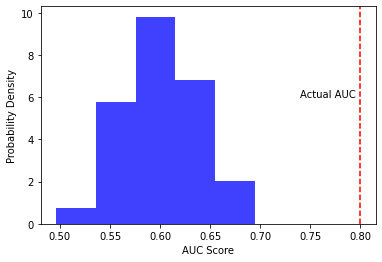

In [ ]:
x = [list(pd.read_csv(path+'/randomAuc100AP.csv').auc.astype(float))]

# the histogram of the data
n, bins, patches = plt.hist(x, 5, density=True, facecolor='blue', alpha=0.75)

plt.xlabel('AUC Score')
plt.ylabel('Probability Density')
plt.text(0.74, 6, 'Actual AUC')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.axvline(x=0.8, color='red', linestyle='--')
plt.show()


DP

In [ ]:
#random label distribution

aucDist = []
r = 100
for i in range(r):
  print('\033[1m' + f'Step {i+1} out of {r}:' + '\033[0m')
  hybridAUC = randomHybridAUC(path,imageFolder='Scanpath Images - DP',positiveClass='DP',patience=10)
  aucDist.append(hybridAUC)
  pd.DataFrame.from_dict({'auc':aucDist}).to_csv(path+'/randomAuc100DP.csv',index=False)

Streaming output truncated to the last 5000 lines.
Epoch 27/30
14/14 [==============================] - 1s 38ms/step - loss: 0.6602 - accuracy: 0.6083 - val_loss: 0.7027 - val_accuracy: 0.5155
Epoch 28/30
14/14 [==============================] - 1s 40ms/step - loss: 0.6650 - accuracy: 0.6152 - val_loss: 0.7080 - val_accuracy: 0.4948
Epoch 29/30
14/14 [==============================] - 1s 39ms/step - loss: 0.6725 - accuracy: 0.6106 - val_loss: 0.7082 - val_accuracy: 0.4639
Epoch 30/30
14/14 [==============================] - 1s 39ms/step - loss: 0.6719 - accuracy: 0.6106 - val_loss: 0.7098 - val_accuracy: 0.5361
Epoch 1/30
15/15 [==============================] - 2s 72ms/step - loss: 0.7445 - accuracy: 0.5479 - val_loss: 0.7147 - val_accuracy: 0.5172
Epoch 2/30
15/15 [==============================] - 1s 60ms/step - loss: 0.6941 - accuracy: 0.5739 - val_loss: 0.7331 - val_accuracy: 0.4713
Epoch 3/30
15/15 [==============================] - 1s 62ms/step - loss: 0.7189 - accuracy: 0.5418 

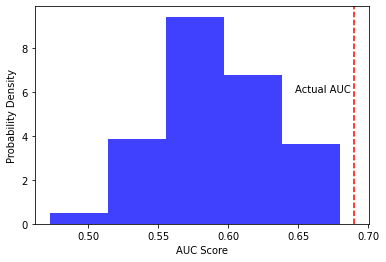

In [ ]:
x = [list(pd.read_csv(path+'/randomAuc100DP.csv').auc.astype(float))]

# the histogram of the data
n, bins, patches = plt.hist(x, 5, density=True, facecolor='blue', alpha=0.75)

plt.xlabel('AUC Score')
plt.ylabel('Probability Density')
plt.text(0.648, 6, 'Actual AUC')
plt.axvline(x=0.69, color='red', linestyle='--')
plt.show()
